## Import all neccory Library

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Generate random data

In [72]:
np.random.seed(42)
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)   # equation is y=0.8x+0.9x2 +2 + some noise

## Plot data

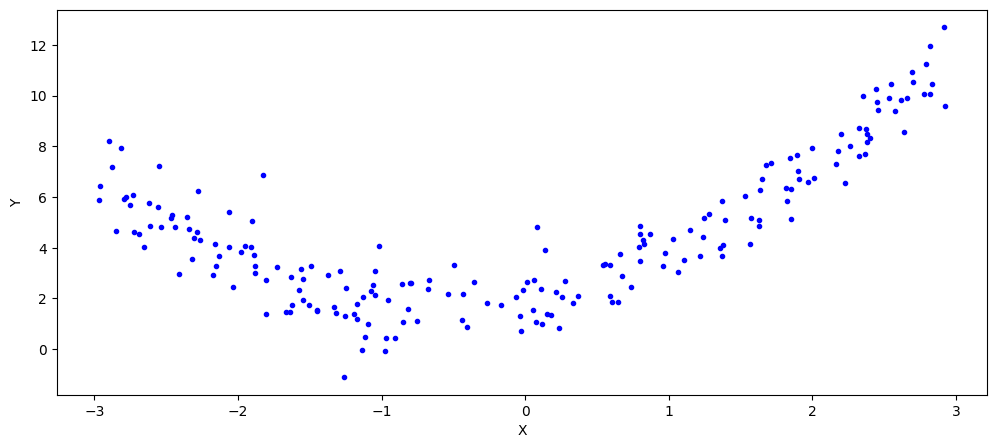

In [73]:
plt.figure(figsize=(12,5))
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### As we can see that data has curve so we will fit Polynomail Regression

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train linear Regression Model

In [75]:
model1=LinearRegression()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_train)
y_test_pred1=model1.predict(X_test)
print(f'R2 score for simple Linear regrssion  on training data: {r2_score(y_train,y_pred1)}' )
print(f'R2 score for simple Linear regrssion  on test data: {r2_score(y_test,y_test_pred1)}' )

R2 score for simple Linear regrssion  on training data: 0.3093465498354805
R2 score for simple Linear regrssion  on test data: 0.20204155643802535


## Plot Linear Regrssion Line

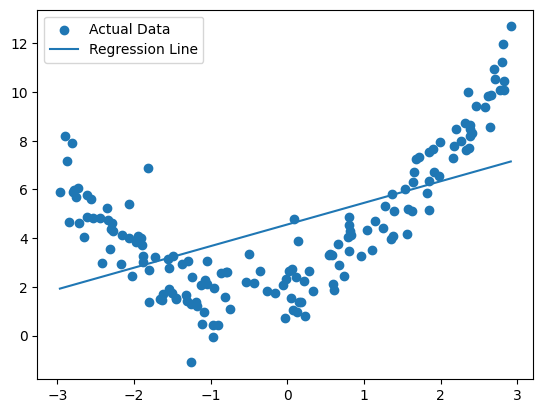

In [76]:
sorted_idx = np.argsort(X_train.flatten())
plt.scatter(X_train, y_train, label='Actual Data')
X_sorted = X_train[sorted_idx]
y_sorted = y_pred1[sorted_idx]
plt.plot(X_sorted, y_sorted, label='Regression Line')
plt.legend()
plt.show()

## Ploynomail  Regression with degree two

In [77]:
from sklearn.preprocessing import PolynomialFeatures

### Convert input into polynomial term 

In [78]:
poly_feature=PolynomialFeatures(degree=2,include_bias=False)

In [79]:
X_train_poly=poly_feature.fit_transform(X_train)
X_test_poly=poly_feature.transform(X_test)

In [80]:
X_train[0]

array([-2.30478564])

In [81]:
X_train_poly[0]

array([-2.30478564,  5.31203686])

In [82]:
model=LinearRegression()
model.fit(X_train_poly,y_train)

LinearRegression()

In [83]:
print(f" weights are : {model.coef_}")
print(f" bias is : {model.intercept_}")

 weights are : [[0.91803513 0.8157192 ]]
 bias is : [2.01784436]


In [84]:
# score on training data
y_pred1=model.predict(X_train_poly)
print(r2_score(y_train, y_pred1))

0.8867241733117016


In [85]:
# Score on test data
y_pred1=model.predict(X_test_poly)
print(r2_score(y_test, y_pred1))

0.85912739182751


In [86]:
X_plot1=np.linspace(X_train.min(),X_train.max(),200).reshape(-1,1)
X_poly1=poly_feature.transform(X_plot1)
y_plot1=model.predict(X_poly1)

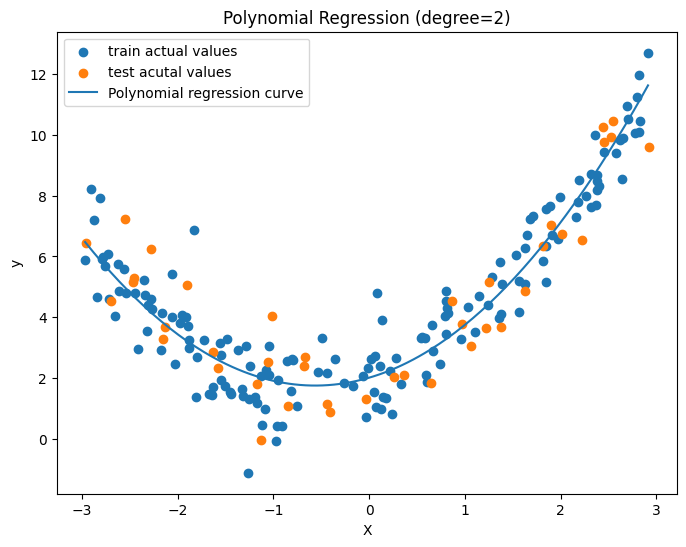

In [87]:
plt.figure(figsize=(8, 6))
# Training data
plt.scatter(X_train, y_train,label='train actual values')
# Test data
plt.scatter(X_test, y_test,label='test acutal values')
# Polynomial regression curve
plt.plot(X_plot1, y_plot1,label='Polynomial regression curve')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression (degree=2)")
plt.legend()
plt.savefig("Polynomial-Regression-(degree=2).png")
plt.show()


### Now Polynomail Regression with degree 3 

In [88]:
poly_feature_deg_3=PolynomialFeatures(degree=3,include_bias=False)

In [89]:
X_train_poly_3=poly_feature_deg_3.fit_transform(X_train)
X_test_poly_3=poly_feature_deg_3.transform(X_test)

In [90]:
X_train_poly_3[0]

array([ -2.30478564,   5.31203686, -12.24310629])

In [91]:
model2=LinearRegression()
model2.fit(X_train_poly_3,y_train)

LinearRegression()

In [92]:
# Score on trainig data
y_pred2=model2.predict(X_train_poly_3)
print(f'R2 score for poly with degree 3 : {r2_score(y_pred2,y_train)}')

R2 score for poly with degree 3 : 0.8763524166503037


In [93]:
# Score on test data
y_pred2=model2.predict(X_test_poly_3)
print(f'R2 score for poly with degree 3 : {r2_score(y_pred2,y_test)}')

R2 score for poly with degree 3 : 0.839554299989682


#### We neeed to draw graph on sorted X

In [94]:
x_plot2=np.linspace(X_train.min(),X_train.max(),200).reshape(-1,1)
x_poly2=poly_feature_deg_3.transform(x_plot2)
y_plot=model2.predict(x_poly2)

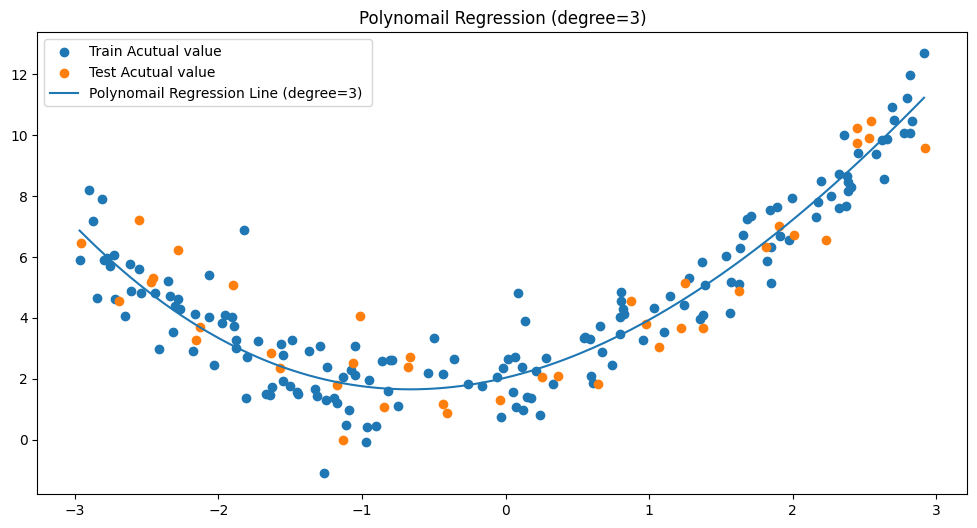

In [95]:
plt.figure(figsize=(12,6))
plt.title('Polynomail Regression (degree=3)')
plt.scatter(X_train,y_train,label='Train Acutual value')
plt.scatter(X_test,y_test,label='Test Acutual value')
plt.plot(x_plot2,y_plot,label='Polynomail Regression Line (degree=3) ')
plt.legend()
plt.savefig("Polynomail-Regression-Line-(degree=3).png")
plt.show()

### Now Polynomail Regression with degree 5

In [96]:
poly_feature=PolynomialFeatures(degree=5,include_bias=False)
X_train_poly_5=poly_feature.fit_transform(X_train)
X_test_poly_5=poly_feature.transform(X_test)

In [97]:
X_train_poly_5[0]

array([ -2.30478564,   5.31203686, -12.24310629,  28.2177356 ,
       -65.03583188])

In [98]:
model3=LinearRegression()
model3.fit(X_train_poly_5,y_train)

LinearRegression()

In [99]:
# Score on trainig data
y_pred3=model3.predict(X_train_poly_5)
print(f'R2 score for poly with degree 5 : {r2_score(y_pred3,y_train)*100:.2f}%')

R2 score for poly with degree 5 : 87.81%


In [100]:
# Score on test data
y_pred3=model3.predict(X_test_poly_5)
print(f'R2 score for poly with degree 5 : {r2_score(y_pred3,y_test)*100:.2f}%')

R2 score for poly with degree 5 : 83.49%


### Ploting Regrssion Line

In [101]:
X_plot=np.linspace(X_train.min(),X_train.max(),200).reshape(-1,1)
X_plot_poly=poly_feature.transform(X_plot)
y_plot3=model3.predict(X_plot_poly)

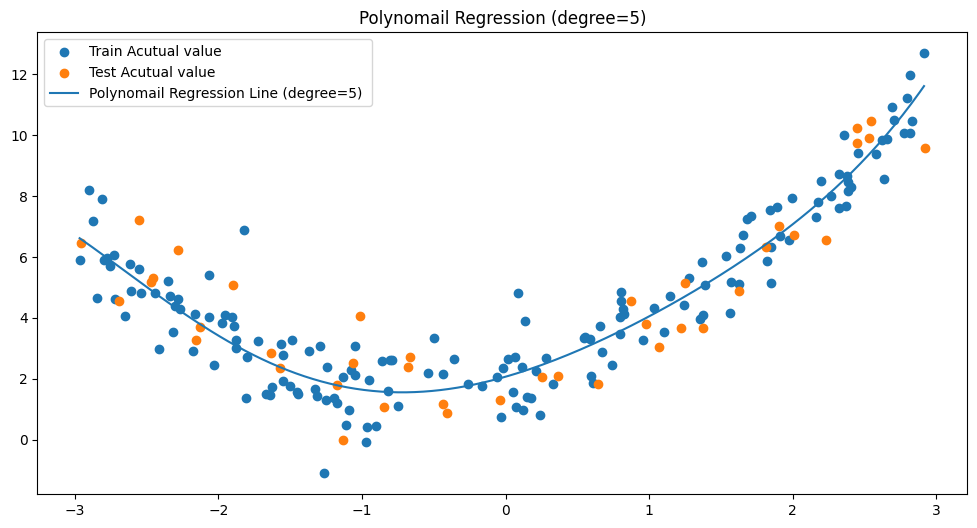

In [102]:
plt.figure(figsize=(12,6))
plt.title('Polynomail Regression (degree=5)')
plt.scatter(X_train,y_train,label='Train Acutual value')
plt.scatter(X_test,y_test,label='Test Acutual value')
plt.plot(X_plot,y_plot3,label='Polynomail Regression Line (degree=5) ')
plt.legend()
plt.savefig("Polynomail-Regression-Line-(degree=5).png")
plt.show()

### Now with degree 10

In [103]:
poly_feature=PolynomialFeatures(degree=10,include_bias=False)

In [104]:
X_train_poly4=poly_feature.fit_transform(X_train)
X_test_poly4=poly_feature.transform(X_test)

In [105]:
X_train_poly4[0]

array([-2.30478564e+00,  5.31203686e+00, -1.22431063e+01,  2.82177356e+01,
       -6.50358319e+01,  1.49893652e+02, -3.45472736e+02,  7.96240602e+02,
       -1.83516391e+03,  4.22965943e+03])

In [106]:
model4=LinearRegression()
model4.fit(X_train_poly4,y_train)

LinearRegression()

In [107]:
# Score on trainig data
y_pred4=model4.predict(X_train_poly4)
print(f"R2 score for polynomail with degree 10 : {r2_score(y_pred4,y_train)*100:.2f}")

R2 score for polynomail with degree 10 : 88.13


In [108]:
y_pred4=model4.predict(X_test_poly4)
print(f"R2 score for polynomail with degree 10 : {r2_score(y_pred4,y_test)*100:.2f}")

R2 score for polynomail with degree 10 : 82.03


In [109]:
X_plot=np.linspace(X_train.min(),X_train.max(),200).reshape(-1,1)
X_plot_poly4=poly_feature.transform(X_plot)
y_plot4=model4.predict(X_plot_poly4)

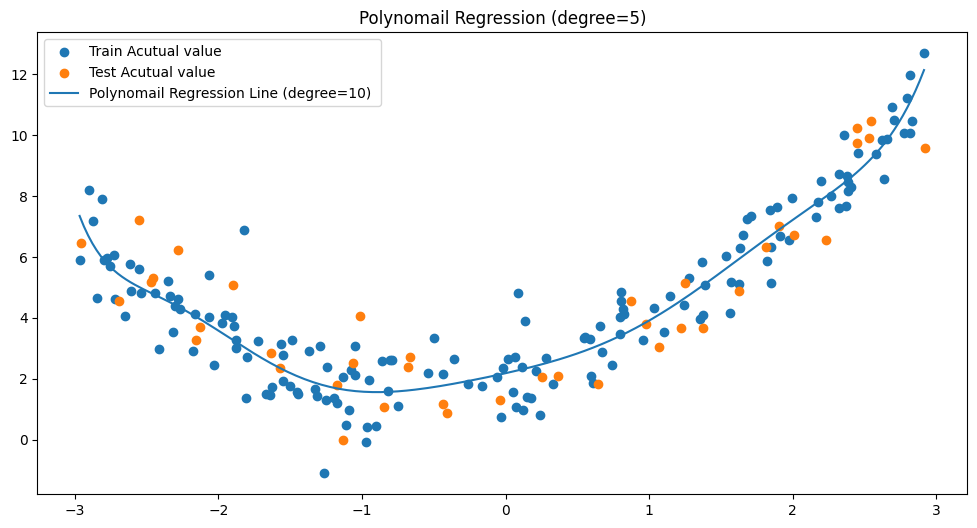

In [110]:
plt.figure(figsize=(12,6))
plt.title('Polynomail Regression (degree=5)')
plt.scatter(X_train,y_train,label='Train Acutual value')
plt.scatter(X_test,y_test,label='Test Acutual value')
plt.plot(X_plot,y_plot4,label='Polynomail Regression Line (degree=10) ')
plt.legend()
plt.savefig("Polynomail-Regression-Line-(degree=10).png")
plt.show()

### Now ploting All regression Line on one graph to compare each model

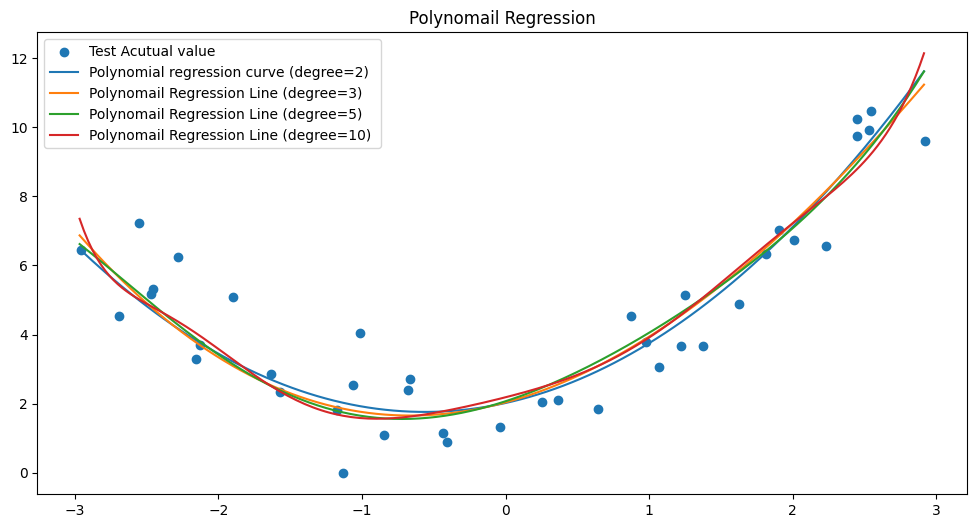

In [111]:
plt.figure(figsize=(12,6))
plt.title('Polynomail Regression')

plt.scatter(X_test,y_test,label='Test Acutual value')
plt.plot(X_plot1, y_plot1,label='Polynomial regression curve (degree=2) ')
plt.plot(x_plot2,y_plot,label='Polynomail Regression Line (degree=3) ')
plt.plot(X_plot,y_plot3,label='Polynomail Regression Line (degree=5) ')
plt.plot(X_plot,y_plot4,label='Polynomail Regression Line (degree=10) ')
plt.legend()
plt.savefig("All-Polynomail-Regression-Line-(degree=10).png")
plt.show()

### As we can see that simple linear regression onderfit the model and polynomail with degree 3,5 and 10 overfit the model but polynomial regression with degree 2 best fit the data

## Loop For different degrees

Degree 1
R2 Train: 0.3093
R2 Test : 0.2020
----------------------------------------
Degree 2
R2 Train: 0.8867
R2 Test : 0.8591
----------------------------------------
Degree 3
R2 Train: 0.8900
R2 Test : 0.8550
----------------------------------------
Degree 5
R2 Train: 0.8914
R2 Test : 0.8503
----------------------------------------
Degree 10
R2 Train: 0.8939
R2 Test : 0.8337
----------------------------------------


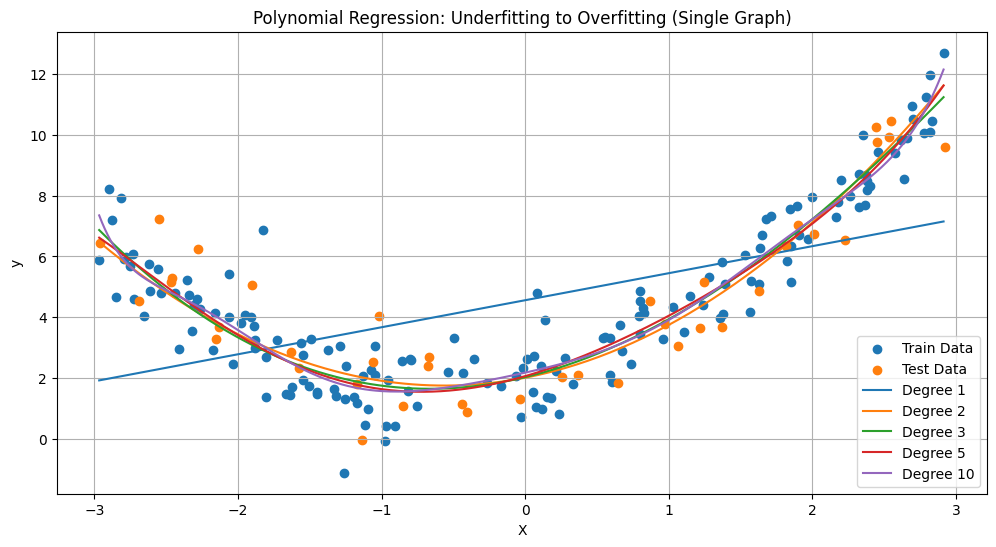

In [112]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

degrees = [1, 2, 3, 5, 10]

plt.figure(figsize=(12, 6))

plt.scatter(X_train, y_train, label='Train Data')
plt.scatter(X_test, y_test, label='Test Data')

x_plot = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions for curve
    x_plot_poly = poly.transform(x_plot)
    y_plot_pred = model.predict(x_plot_poly)
    
    # Plot regression line
    plt.plot(x_plot, y_plot_pred, label=f'Degree {d}')
    
    # Print R2 scores
    print(f'Degree {d}')
    print(f'R2 Train: {r2_score(y_train, model.predict(X_train_poly)):.4f}')
    print(f'R2 Test : {r2_score(y_test, model.predict(X_test_poly)):.4f}')
    print('-' * 40)

plt.title('Polynomial Regression: Underfitting to Overfitting (Single Graph)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Create error table  for polynomial regression

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error

np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.3, 100)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

degrees = [1, 2, 3, 5, 10]


results = []

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    results.append([d, train_mse, test_mse])

error_table = pd.DataFrame(
    results, columns=["Degree", "Train MSE", "Test MSE"]
)
error_table.to_csv("Error_Table.csv")
error_table


,Degree,Train MSE,Test MSE
0,1,0.230157,0.317963
1,2,0.224719,0.290679
2,3,0.073690,0.092421
3,5,0.073149,0.099644
4,10,0.072339,0.106364


### Low train + high test error → Overfitting

### High train + high test error → Underfitting

### Balanced low errors → Good fit

## Learning curve


In [114]:
from sklearn.model_selection import learning_curve

In [115]:
poly_feature=PolynomialFeatures(degree=2,include_bias=False)

In [116]:
X_poly=poly_feature.fit_transform(X_train)
model=LinearRegression()

In [117]:
train_size,train_score,test_score=learning_curve(
    model,
    X_poly,
    y_train,
    cv=3,
    scoring='neg_mean_squared_error',
    train_sizes=np.array([0.2,0.4,0.5])
)

In [118]:
train_size

array([ 9, 18, 23])

In [119]:
train_error = -train_score.mean(axis=1)
test_error = -test_score.mean(axis=1)

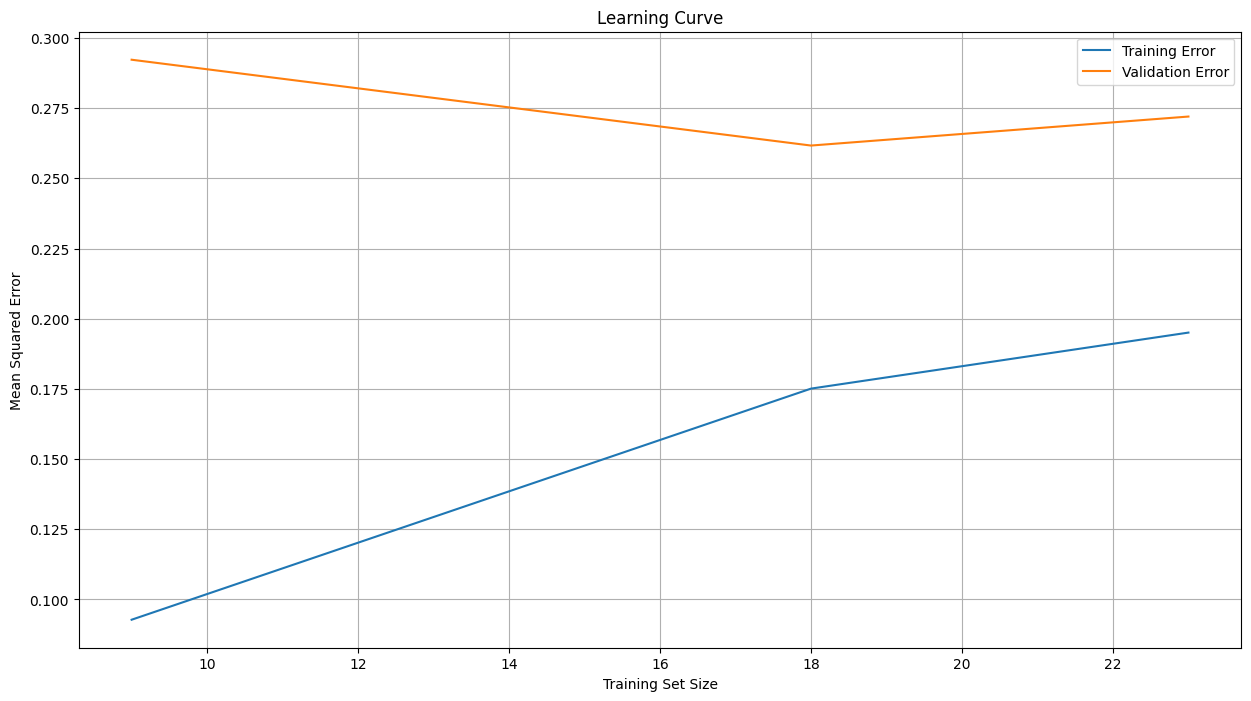

In [120]:
plt.figure(figsize=(15,8))
plt.plot(train_size, train_error, label='Training Error')
plt.plot(train_size, test_error, label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.savefig("Learning_curve_degree=2")
plt.show()

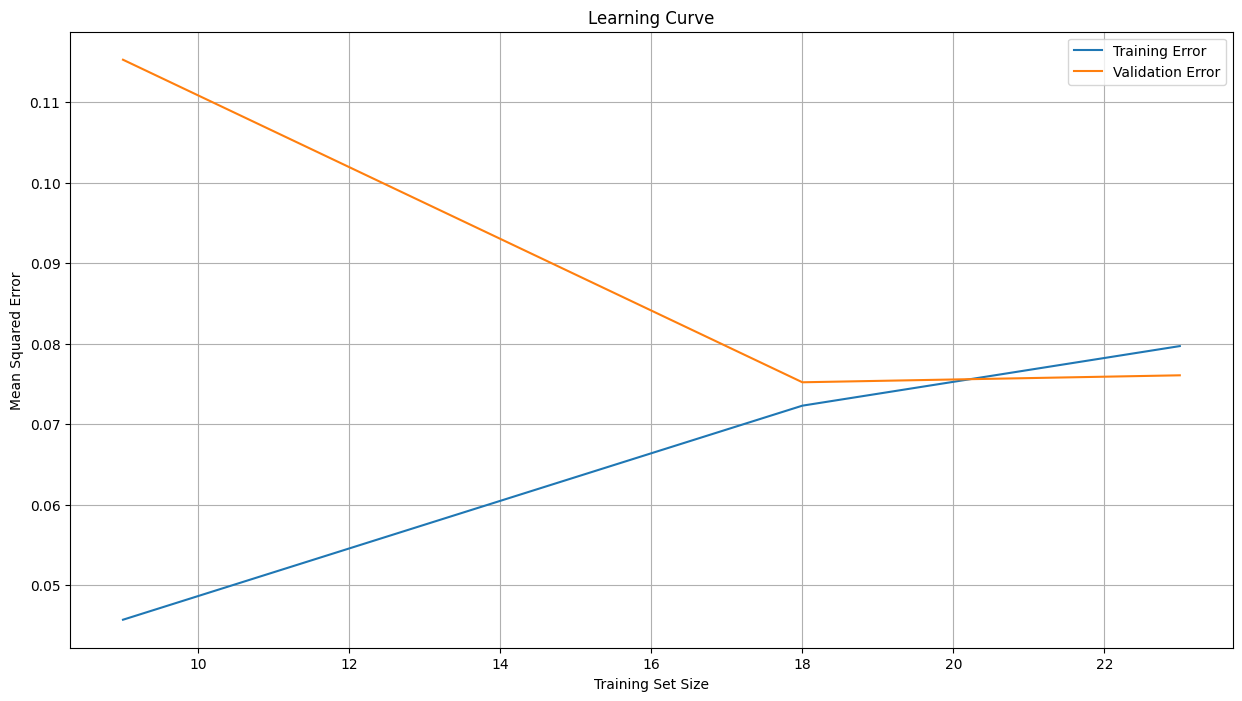

In [121]:
poly_feature=PolynomialFeatures(degree=3,include_bias=False)
X_poly=poly_feature.fit_transform(X_train)
model=LinearRegression()
train_size,train_score,test_score=learning_curve(
    model,
    X_poly,
    y_train,
    cv=3,
    scoring='neg_mean_squared_error',
    train_sizes=np.array([0.2,0.4,0.5])
)
train_error = -train_score.mean(axis=1)
test_error = -test_score.mean(axis=1)
plt.figure(figsize=(15,8))
plt.plot(train_size, train_error, label='Training Error')
plt.plot(train_size, test_error, label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.savefig("Learning_curve_degree=3")
plt.show()

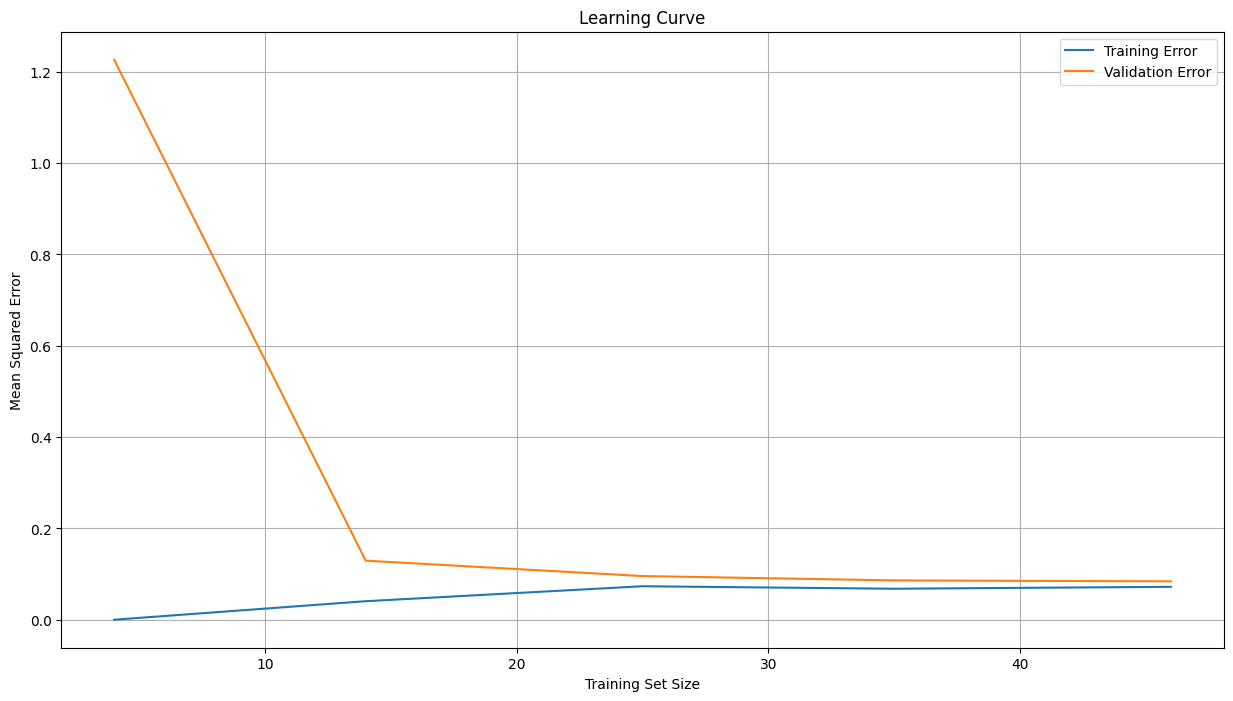

In [122]:
poly_feature=PolynomialFeatures(degree=5,include_bias=False)
X_poly=poly_feature.fit_transform(X_train)
model=LinearRegression()
train_size,train_score,test_score=learning_curve(
    model,
    X_poly,
    y_train,
    cv=3,
    scoring='neg_mean_squared_error',
)
train_error = -train_score.mean(axis=1)
test_error = -test_score.mean(axis=1)
plt.figure(figsize=(15,8))
plt.plot(train_size, train_error, label='Training Error')
plt.plot(train_size, test_error, label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.savefig("Learning_curve_degree=5")
plt.show()

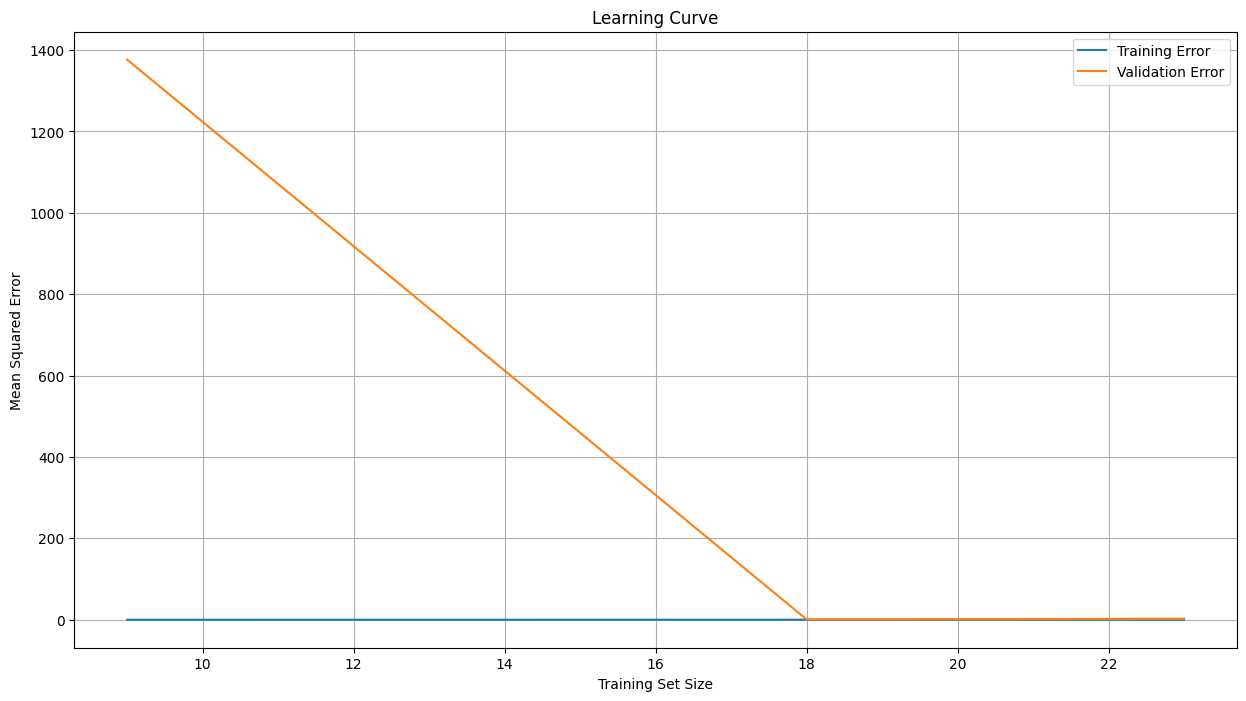

In [123]:
poly_feature=PolynomialFeatures(degree=10,include_bias=False)
X_poly=poly_feature.fit_transform(X_train)
model=LinearRegression()
train_size,train_score,test_score=learning_curve(
    model,
    X_poly,
    y_train,
    cv=3,
    scoring='neg_mean_squared_error',
    train_sizes=np.array([0.2,0.4,0.5])
)
train_error = -train_score.mean(axis=1)
test_error = -test_score.mean(axis=1)
plt.figure(figsize=(15,8))
plt.plot(train_size, train_error, label='Training Error')
plt.plot(train_size, test_error, label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.savefig("Learning_curve_degree=10")
plt.show()